In [1]:
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [5]:
df = pd.read_csv("data/telco.csv")

In [24]:
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn,Churn Score,CLTV
0,6207,1,78,0,1,0,0,0,0,0,...,39.65,0.00,20,0.00,59.65,3,0,1,91,5433
1,5305,0,74,0,1,1,1,1,0,0,...,633.30,0.00,0,390.80,1024.10,3,0,1,69,5302
2,1129,1,71,0,1,0,1,3,0,0,...,1752.55,45.61,0,203.94,1910.88,2,0,1,81,3179
3,3208,0,78,0,1,1,1,1,0,0,...,2514.50,13.43,0,494.00,2995.07,2,0,1,88,5337
4,3419,0,80,0,1,1,1,1,0,0,...,2868.15,0.00,0,234.21,3102.36,2,0,1,67,2793


In [6]:
print(df.columns)

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')


In [7]:
print(df['Churn Label'].unique())

['Yes' 'No']


In [8]:
df.rename(columns={'Churn Label': 'Churn'}, inplace=True)

In [22]:
print(df['Churn'].unique())

[1 0]


In [23]:
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nClass Distribution:")
print(df['Churn'].value_counts())

Dataset Head:
   Customer ID  Gender  Age  Under 30  Senior Citizen  Married  Dependents  \
0         6207       1   78         0               1        0           0   
1         5305       0   74         0               1        1           1   
2         1129       1   71         0               1        0           1   
3         3208       0   78         0               1        1           1   
4         3419       0   80         0               1        1           1   

   Number of Dependents  Country  State  ...  Total Charges  Total Refunds  \
0                     0        0      0  ...          39.65           0.00   
1                     1        0      0  ...         633.30           0.00   
2                     3        0      0  ...        1752.55          45.61   
3                     1        0      0  ...        2514.50          13.43   
4                     1        0      0  ...        2868.15           0.00   

   Total Extra Data Charges  Total Long Distance

In [10]:
# Drop columns with more than 10% missing values
df = df.dropna(axis=1, thresh=0.9 * len(df))

# Impute remaining missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)  # Mode for categorical columns
    else:
        df[col].fillna(df[col].median(), inplace=True)   # Median for numerical columns
# Verify missing values
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
Customer ID                          0
Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Number of Dependents                 0
Country                              0
State                                0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Population                           0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Avg Monthly GB Download              0
Online Security                 

C:\Users\saumi\AppData\Local\Temp\ipykernel_59808\2797293927.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Mode for categorical columns
C:\Users\saumi\AppData\Local\Temp\ipykernel_59808\2797293927.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [21]:
# ✅ Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)

# ✅ Initialize LabelEncoders for each categorical column
encoder_dict = {}

for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])  # Apply encoding to the dataset
    encoder_dict[col] = encoder  # Store encoder for each categorical column

# ✅ Create "models" directory if it doesn't exist
models_dir = "models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# ✅ Save the encoder dictionary
ENCODER_PATH = os.path.join(models_dir, "encoder.pkl")
joblib.dump(encoder_dict, ENCODER_PATH)

print(f"✅ Encoders saved successfully at: {ENCODER_PATH}")




Categorical Columns: []
✅ Encoders saved successfully at: models\encoder.pkl


In [12]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# ✅ Split dataset first (Before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("✅ SMOTE Applied - Training set balanced!")



✅ SMOTE Applied - Training set balanced!


In [13]:
# ✅ Scale numeric features
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

# Convert back to DataFrame
X_train_sm = pd.DataFrame(X_train_sm, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# ✅ Save processed datasets
if not os.path.exists("data"):
    os.makedirs("data")

X_train_sm.to_csv("data/X_train_sm.csv", index=False)
y_train_sm.to_csv("data/y_train_sm.csv", index=False)
X_test.to_csv("data/X_test.csv", index=False)
y_test.to_csv("data/y_test.csv", index=False)

print("✅ Data Preprocessing Complete! Files saved in 'data' folder.")


✅ Data Preprocessing Complete! Files saved in 'data' folder.


In [19]:
# Create 'data' folder if not exists
import os
if not os.path.exists('data'):
    os.makedirs('data')

# Save the datasets
X_train_sm.to_csv("data/X_train_sm.csv", index=False)
y_train_sm.to_csv("data/y_train_sm.csv", index=False)
X_test.to_csv("data/X_test.csv", index=False)
y_test.to_csv("data/y_test.csv", index=False)

print("\n✅ Preprocessed data saved successfully!")



✅ Preprocessed data saved successfully!


C:\Users\saumi\AppData\Local\Temp\ipykernel_59808\459810283.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette="viridis")
C:\Users\saumi\AppData\Local\Temp\ipykernel_59808\459810283.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_sm, ax=axes[1], palette="viridis")


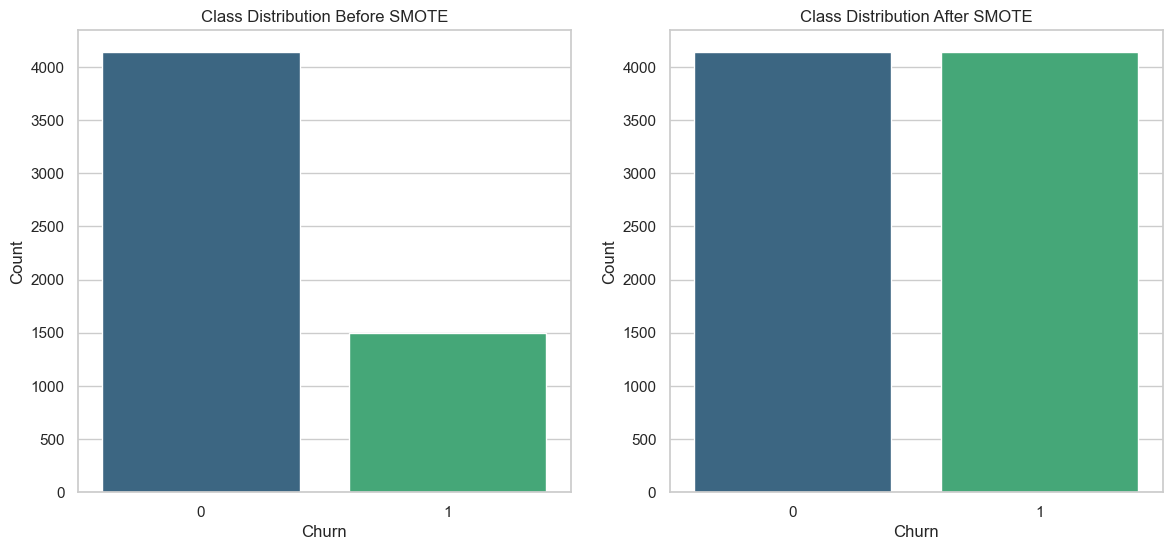

In [14]:
# Plot class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=y_train, ax=axes[0], palette="viridis")
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Count")

sns.countplot(x=y_train_sm, ax=axes[1], palette="viridis")
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Count")

plt.show()


In [15]:
print("✅ Data preprocessing completed successfully! 🚀")
print(f"Training set size (after SMOTE): {X_train_sm.shape}")
print(f"Test set size: {X_test.shape}")


✅ Data preprocessing completed successfully! 🚀
Training set size (after SMOTE): (8278, 45)
Test set size: (1409, 45)


In [16]:
print("\nFinal Check - Missing Values in Processed Datasets:")
print("X_train_sm Missing:", X_train_sm.isnull().sum().sum())
print("X_test Missing:", X_test.isnull().sum().sum())



Final Check - Missing Values in Processed Datasets:
X_train_sm Missing: 0
X_test Missing: 0


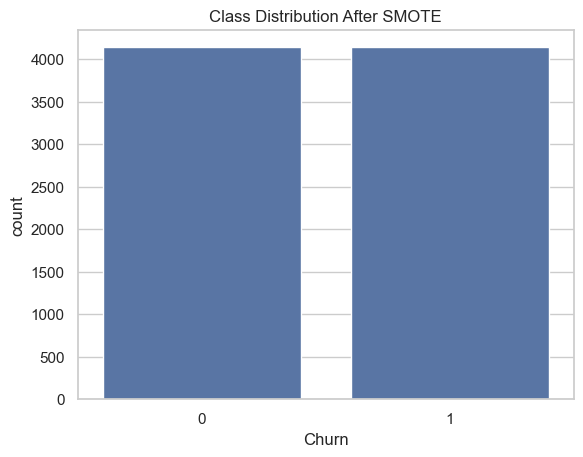

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train_sm)
plt.title("Class Distribution After SMOTE")
plt.show()


In [18]:
import os

files = ["data/X_train_sm.csv", "data/y_train_sm.csv", "data/X_test.csv", "data/y_test.csv"]

for file in files:
    print(f"✅ {file} exists: {os.path.exists(file)}")


✅ data/X_train_sm.csv exists: True
✅ data/y_train_sm.csv exists: True
✅ data/X_test.csv exists: True
✅ data/y_test.csv exists: True


In [19]:
import pandas as pd

# Load files to check their contents
X_train_sm = pd.read_csv("data/X_train_sm.csv")
y_train_sm = pd.read_csv("data/y_train_sm.csv")
X_test = pd.read_csv("data/X_test.csv")
y_test = pd.read_csv("data/y_test.csv")

# Print shapes
print("✅ X_train_sm Shape:", X_train_sm.shape)
print("✅ y_train_sm Shape:", y_train_sm.shape)
print("✅ X_test Shape:", X_test.shape)
print("✅ y_test Shape:", y_test.shape)

# Print first few rows to confirm data is saved properly
print("\n🧐 First few rows of y_train_sm:")
print(y_train_sm.head())

print("\n🧐 First few rows of y_test:")
print(y_test.head())


✅ X_train_sm Shape: (8278, 45)
✅ y_train_sm Shape: (8278, 1)
✅ X_test Shape: (1409, 45)
✅ y_test Shape: (1409, 1)

🧐 First few rows of y_train_sm:
   Churn
0      0
1      0
2      0
3      0
4      0

🧐 First few rows of y_test:
   Churn
0      0
1      0
2      0
3      0
4      0


In [20]:
# Save the datasets again if needed
if not os.path.exists('data'):
    os.makedirs('data')

X_train_sm.to_csv("data/X_train_sm.csv", index=False)
y_train_sm.to_csv("data/y_train_sm.csv", index=False)
X_test.to_csv("data/X_test.csv", index=False)
y_test.to_csv("data/y_test.csv", index=False)

print("✅ Datasets saved again successfully!")


✅ Datasets saved again successfully!


In [25]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib

# Load dataset
df = pd.read_csv("data/telco.csv")

# Identify categorical columns
categorical_cols = ["Contract", "Payment Method", "Online Security", "Premium Tech Support", "Dependents"]

# Initialize LabelEncoders for each categorical column
encoder_dict = {}

for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])  # Fit encoding on training data
    encoder_dict[col] = encoder  # Store encoder for each categorical column

# Save the encoder dictionary
joblib.dump(encoder_dict, "models/encoder.pkl")
print("✅ Encoders saved successfully!")


✅ Encoders saved successfully!


In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib

# Load dataset
df = pd.read_csv("data/telco.csv")

# Identify categorical columns
categorical_cols = ["Contract", "Payment Method", "Online Security", "Premium Tech Support", "Dependents", "Referred a Friend"]

# Initialize LabelEncoders for each categorical column
encoder_dict = {}

for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])  # Fit encoding on training data
    encoder_dict[col] = encoder  # Store encoder for each categorical column

# Save the encoder dictionary
joblib.dump(encoder_dict, "models/encoder.pkl")
print("✅ Encoders saved successfully!")


✅ Encoders saved successfully!


In [1]:
import joblib
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

# ✅ Load the dataset (Ensure you're using the preprocessed training data)
df = pd.read_csv("data/X_train_sm.csv")  # Use the correct file path

# ✅ Identify categorical columns (if they exist)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\n✅ Categorical Columns:", categorical_cols)


✅ Categorical Columns: []


In [2]:
print(df.dtypes)


Customer ID                          float64
Gender                               float64
Age                                  float64
Under 30                             float64
Senior Citizen                       float64
Married                              float64
Dependents                           float64
Number of Dependents                 float64
Country                              float64
State                                float64
City                                 float64
Zip Code                             float64
Latitude                             float64
Longitude                            float64
Population                           float64
Quarter                              float64
Referred a Friend                    float64
Number of Referrals                  float64
Tenure in Months                     float64
Phone Service                        float64
Avg Monthly Long Distance Charges    float64
Multiple Lines                       float64
Internet S